In [1]:
from IFS import propagateIFS
import numpy as np
from params import Params
from astropy.io import fits as pyf
import time
import logging as log
from tools.initLogger import initLogger

%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'


Populating the interactive namespace from numpy and matplotlib


In [2]:
# load parameters
par = Params()
print (par.output())


Number of lenslets: 108
Lenslet pitch in meters: 0.000174
Interlacing: 2
Rotation angle: -0.463647609001
Pinhole? True
Pinhole diameter: 2.5e-05
Number of pixels in final detector: 1024
Detector pixel size in meters: 1.3e-05
Oversampling: 11
Convolve with Gaussian as defocus? True
FWHM of Gaussian convolution 1.5 detector pixel



In [4]:
# initalize logger; both console and text file
initLogger(par.exportDir+'/IFS.log')
log.info('Loading input')

2017-01-12 16:31:18,721: INFO     Loading input


In [5]:
# this is an example input cube
BW = 0.18
Nlam = 51
clam = 0.77
wavelist= clam*np.linspace(1.-BW/2.,1.+BW/2.,Nlam)
fname = './Inputs/PSF_SPLC_Nwvl51_BW18pct_star.fits'
hdu = pyf.open(fname)
inputcube = hdu[0].data    
mperpix = 3./5.*par.pitch # 5 pixels per lambda/D
par.pixperlenslet = par.pitch/mperpix
par.mperpix = mperpix


In [6]:
# main function; saves things to FITS
finalFrame = propagateIFS(par,wavelist,inputcube)

2017-01-12 16:31:25,635: INFO     The number of input pixels per lenslet is 1.666667
2017-01-12 16:31:25,636: INFO     The plate scale of the input cube is 104.400000 um/pixel
2017-01-12 16:31:25,637: INFO     Import all kernels and rescale them to same plate scale
2017-01-12 16:31:25,638: INFO     Loading spot diagrams.
2017-01-12 16:31:25,681: INFO     kernel scale average is 1.706 micron per pixel at 890 nm
2017-01-12 16:31:25,682: INFO     Resampling kernels to match input
2017-01-12 16:31:25,753: INFO     pxprlens: 184.000
2017-01-12 16:31:25,755: WARNING  Kernel too small to capture crosstalk
2017-01-12 16:31:25,765: WARNING  Kernel too small to capture crosstalk
2017-01-12 16:31:25,772: WARNING  Kernel too small to capture crosstalk
2017-01-12 16:31:25,778: WARNING  Kernel too small to capture crosstalk
2017-01-12 16:31:25,784: WARNING  Kernel too small to capture crosstalk
2017-01-12 16:31:25,790: WARNING  Kernel too small to capture crosstalk
2017-01-12 16:31:25,796: WARNING  

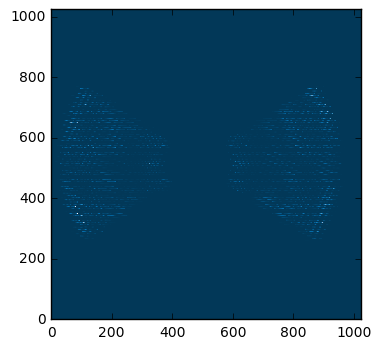

In [7]:
pylab.imshow(finalFrame, cmap='PuBu_r')